You can download Voyager 1 (https://voyager.jpl.nasa.gov/) hourly merged magnetic field and plasma data from the Coordinated Data Analysis Web (CDAWeb, https://cdaweb.gsfc.nasa.gov/).

In [1]:
file = "./VOYAGER1_COHO1HR_MERGED_MAG_PLASMA.txt"

full_text = open(file, "r")

In [2]:
date = []
time = []
distance = []
magnetic = []
proton = []

n = 0
    
while True:
   
    line = full_text.readline()
    if not line: break
             
    if '#' not in line :

        n += 1
        columns = line.split()

        if (n == 1):
            header = columns
            
        elif (n == 2):
            units = columns
                                
        else:
            if ((float(columns[3]) > -1e30) &
                (float(columns[4]) > -1e30)):
                
                date.append(columns[0])
                time.append(columns[1])
                
                distance.append(columns[2])
                magnetic.append(columns[3])
                proton.append(columns[4])
                
print(header)
print(units)
print(columns)

['EPOCH', 'VOYAGER1_DIST', 'FIELD_MAGNITUDE_AVG.', 'H_4.600-6.200_MEV,_CRS']
['dd-mm-yyyy', 'hh:mm:ss.ms', 'AU', 'nT', '1/(cm^2_sec_ster_MeV)']
['31-12-2018', '23:00:00.000', '144.270', '-1.00000E+31', '0.00132200']


In [3]:
import datetime

dates =[]
        
for i in range(0,len(date)):
    date1  = date[i]
    time1  = time[i]
            
    day    = int(date1[0:2])
    month  = int(date1[3:5])
    year   = int(date1[6:10])
            
    hour   = int(time1[0:2])
    minute = int(time1[3:5])
    second = int(time1[6:8])
    msec   = int(time1[9:11])
            
    one_day = datetime.datetime(year,month,day,hour,minute,second,msec)
            
    dates.append(one_day)

print("Date[1st]: ", dates[0])

Date[1st]:  2008-01-01 12:00:00


In [4]:
import numpy as np

distance = np.asarray(distance, dtype = float)
magnetic = np.asarray(magnetic, dtype = float)
proton = np.asarray(proton, dtype = float)

print("Distance[1st]: ", distance[0])
print("Magnetude of Magnetic fields[1st]: ", magnetic[0])
print("Proton Flux[1st]: ", proton[0])

Distance[1st]:  104.93
Magnetude of Magnetic fields[1st]:  0.085
Proton Flux[1st]:  0.1284


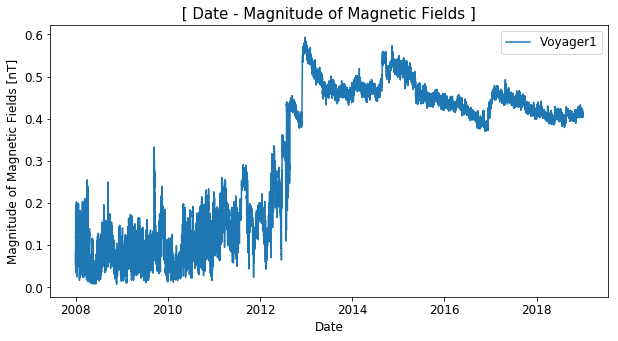

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot_date(dates, magnetic, '-')

plt.title(" [ Date - Magnitude of Magnetic Fields ] ", fontsize = 15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Magnitude of Magnetic Fields [nT]', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(['Voyager1'],fontsize=12)

plt.show()

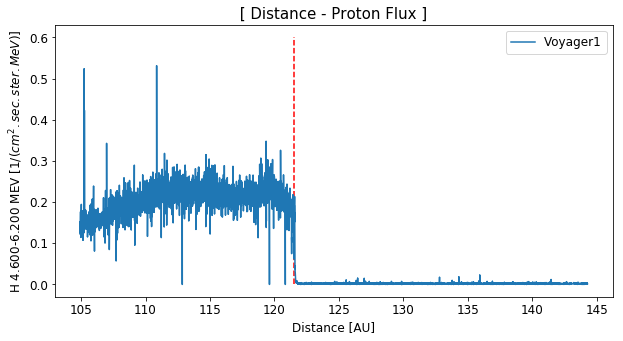

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(distance, proton, '-')

plt.title(" [ Distance - Proton Flux ] ", fontsize = 15)
plt.xlabel('Distance [AU]', fontsize=12)
plt.ylabel('H 4.600-6.200 MEV [$1/(cm^2.sec.ster.MeV)$]', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(['Voyager1'],fontsize=12)

plt.vlines(121.5, 0, 0.6, color='red', linestyle='--')

plt.show()